# **Google DA Certificate Case Study 1**
**How Does a Bike-Share Navigate Speedy Success?**
# **An Hu**
# **Data Analsyt**
# **2023/02/08**

# **Background**
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo-tracked and locked into a network of 692 stations across Chicago.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

# **Case study**
This report will examine the business question: 'what is the most effective marketing strategy to converting Cyclistic’s casual riders to annul memberships?'

It is understood that the goal can be broken down into 3 main questions.

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

This report will seek to deliver on the following objectives:

How do annual members and casual riders use Cyclistic bikes differently?

# **Stakeholders**
This report also seeks to identify the important stakeholders that are involved in the overall analysis. This includes:

* Cyclistic users
* Director of marketing
* Cyclistic marketing team
* Cyclistic executive team

# **Data sources**
User data from the past 12 months, January 2022 - December 2022 has been made available. Each data set is in csv format and details every ride logged by Cyclistic customers. This data has been made publicly available via license by Motivate International Inc. and the city of Chicago available here. All user’s personal data has been scrubbed for privacy, which  means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the
Cyclistic service area or if they have purchased multiple single passes.

Documentation, cleaning and preparation of data for analysis
Tools for analysis
R is being used due to the data size and visualizations needed to complete this analysis.

# **Documentation, cleaning and preparation of data for analysis**
* **Tools for analysis**
Python is being used due to the data size and visualizations needed to complete this analysis.

* **Preparation of Data**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Collect Data

In [109]:
t202201=pd.read_csv("/kaggle/input/cyclistic-2022/202201-divvy-tripdata.csv")
t202202=pd.read_csv("/kaggle/input/cyclistic-2022/202202-divvy-tripdata.csv")
t202203=pd.read_csv("/kaggle/input/cyclistic-2022/202203-divvy-tripdata.csv")
t202204=pd.read_csv("/kaggle/input/cyclistic-2022/202204-divvy-tripdata.csv")
t202205=pd.read_csv("/kaggle/input/cyclistic-2022/202205-divvy-tripdata.csv")
t202206=pd.read_csv("/kaggle/input/cyclistic-2022/202206-divvy-tripdata.csv")
t202207=pd.read_csv("/kaggle/input/cyclistic-2022/202207-divvy-tripdata.csv")
t202208=pd.read_csv("/kaggle/input/cyclistic-2022/202208-divvy-tripdata.csv")
t202209=pd.read_csv("/kaggle/input/cyclistic-2022/202209-divvy-tripdata.csv")
t202210=pd.read_csv("/kaggle/input/cyclistic-2022/202210-divvy-tripdata.csv")
t202211=pd.read_csv("/kaggle/input/cyclistic-2022/202211-divvy-tripdata.csv")
t202212=pd.read_csv("/kaggle/input/cyclistic-2022/202212-divvy-tripdata.csv")

## Step 2:Wrangle data and combine into a single file

In [110]:
# Stack individual month's data frames into one big data frame
t2022 = pd.concat([t202201, t202202, t202203, t202204, t202205, t202206, t202207, t202208, t202209, t202210, t202211, t202212], axis=0)


In [111]:
t2022

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


# Step 3: Clean up data and add data for analytics

In [153]:
# Convert the start and end times to datetime objects
t2022['start_time'] = pd.to_datetime(t2022['started_at'])
t2022['end_time'] = pd.to_datetime(t2022['ended_at'])

# Caculate the biking length
t2022['biking_length'] = t2022['end_time'] - t2022['start_time']
t2022['biking_length'] = pd.to_timedelta(t2022['biking_length'], unit="S" )
t2022['biking_length'] = t2022['biking_length'].astype('timedelta64[s]')


# Select the columns we need for analytic
t2022_membership = t2022[['member_casual', 'start_time', 'end_time', 'biking_length']]

In [151]:
t2022_membership

,member_casual,start_time,end_time,biking_length
0,casual,2022-01-13 11:59:47,2022-01-13 12:02:44,177.0
1,casual,2022-01-10 08:41:56,2022-01-10 08:46:17,261.0
2,member,2022-01-25 04:53:40,2022-01-25 04:58:01,261.0
3,casual,2022-01-04 00:18:04,2022-01-04 00:33:00,896.0
4,member,2022-01-20 01:31:10,2022-01-20 01:37:12,362.0
...,...,...,...,...
181801,member,2022-12-05 06:51:04,2022-12-05 06:54:48,224.0
181802,member,2022-12-14 17:06:28,2022-12-14 17:19:27,779.0
181803,member,2022-12-08 16:27:47,2022-12-08 16:32:20,273.0
181804,member,2022-12-28 09:37:38,2022-12-28 09:41:34,236.0


In [154]:
# Inspect the new table that has been created
t2022_membership.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   member_casual  object        
 1   start_time     datetime64[ns]
 2   end_time       datetime64[ns]
 3   biking_length  float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 216.2+ MB


In [155]:
# Describe the basic statistics of the dataframe
t2022_membership.describe()

,biking_length
count,5.667717e+06
mean,1.166597e+03
std,1.056769e+04
min,-6.212010e+05
25%,3.490000e+02
50%,6.170000e+02
75%,1.108000e+03
max,2.483235e+06


We can see there are min that blow 0 and max over 28 days, which don't make sense in the daily use screen. Let's clean the data by filtering it.

In [157]:
t2022_membership = t2022_membership[(t2022_membership['biking_length'] >= 0) ]
t2022_membership['day_of_week'] = t2022_membership['start_time'].dt.day_name()
t2022_membership['month'] = t2022_membership['start_time'].dt.month_name()
t2022_membership = t2022_membership.dropna()

In [158]:
t2022_membership

,member_casual,start_time,end_time,biking_length,day_of_week,month
0,casual,2022-01-13 11:59:47,2022-01-13 12:02:44,177.0,Thursday,January
1,casual,2022-01-10 08:41:56,2022-01-10 08:46:17,261.0,Monday,January
2,member,2022-01-25 04:53:40,2022-01-25 04:58:01,261.0,Tuesday,January
3,casual,2022-01-04 00:18:04,2022-01-04 00:33:00,896.0,Tuesday,January
4,member,2022-01-20 01:31:10,2022-01-20 01:37:12,362.0,Thursday,January
...,...,...,...,...,...,...
181801,member,2022-12-05 06:51:04,2022-12-05 06:54:48,224.0,Monday,December
181802,member,2022-12-14 17:06:28,2022-12-14 17:19:27,779.0,Wednesday,December
181803,member,2022-12-08 16:27:47,2022-12-08 16:32:20,273.0,Thursday,December
181804,member,2022-12-28 09:37:38,2022-12-28 09:41:34,236.0,Wednesday,December


In [159]:
# Inspect the new table that has been created
t2022_membership.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667617 entries, 0 to 181805
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   member_casual  object        
 1   start_time     datetime64[ns]
 2   end_time       datetime64[ns]
 3   biking_length  float64       
 4   day_of_week    object        
 5   month          object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 302.7+ MB


# Step 4: Conduct descripitive analysis

In [160]:
t2022_membership_1 = t2022_membership.pivot_table(index="day_of_week", columns="member_casual", values="biking_length", aggfunc="mean")
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
t2022_membership_1 = t2022_membership_1.reindex(index=days_of_week)
t2022_membership_1

member_casual,casual,member
day_of_week,,
Monday,1751.241714,736.206465
Tuesday,1549.372061,727.769403
Wednesday,1485.050705,726.293370
Thursday,1532.875145,737.563668
Friday,1682.655146,751.846259
Saturday,1956.845071,848.403687
Sunday,2043.476729,841.874633


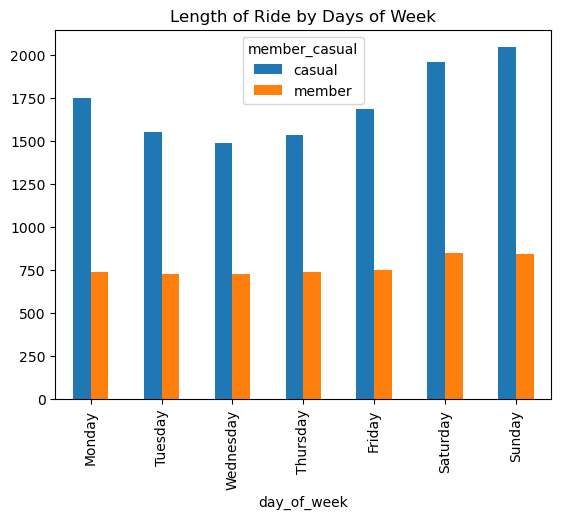

In [170]:
t2022_membership_1.plot(kind="bar",
                       title="Length of Ride by Days of Week")
plt.show()

In [162]:
t2022_membership_2 = t2022_membership.pivot_table(index="month", columns="member_casual", values="biking_length", aggfunc="mean")
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
t2022_membership_2 = t2022_membership_2.reindex(index=months)
t2022_membership_2

member_casual,casual,member
month,,
January,1822.647300,718.890592
February,1602.507051,684.331766
March,1957.391021,717.499732
April,1771.945624,689.544247
May,1852.183350,802.000612
June,1925.976613,839.956119
July,1756.730728,823.118620
August,1758.639020,803.066852
September,1679.127657,778.555670


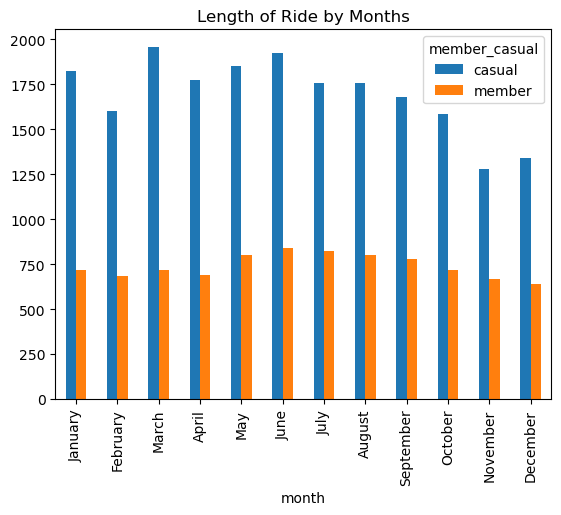

In [171]:
t2022_membership_2.plot(kind="bar",
                       title="Length of Ride by Months")
plt.show()

In [164]:
t2022_membership_3 = pd.crosstab(index=t2022_membership['month'], columns=t2022_membership['member_casual'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
t2022_membership_3 = t2022_membership_3.reindex(index=months)
t2022_membership_3

member_casual,casual,member
month,,
January,18520,85250
February,21416,94193
March,89880,194160
April,126417,244832
May,280414,354443
June,369044,400148
July,406046,417426
August,358917,427000
September,296694,404636


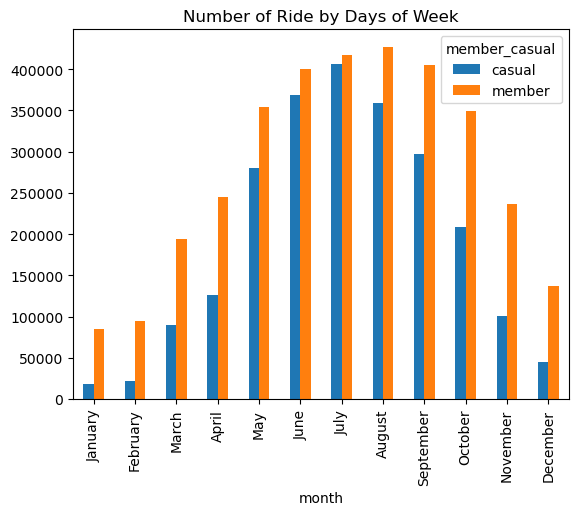

In [165]:
t2022_membership_3.plot(kind="bar",
                       title="Number of Ride by Days of Week")
plt.show()

In [166]:
t2022_membership_4 = pd.crosstab(index=t2022_membership['day_of_week'], columns=t2022_membership['member_casual'])
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
t2022_membership_4 = t2022_membership_4.reindex(index=days_of_week)
t2022_membership_4

member_casual,casual,member
day_of_week,,
Monday,277671,473335
Tuesday,263731,518618
Wednesday,274354,523867
Thursday,309327,532255
Friday,334698,467083
Saturday,473185,443274
Sunday,389011,387208


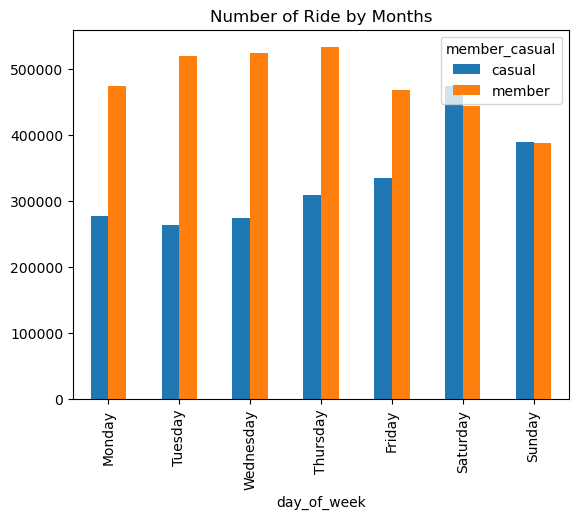

In [168]:
t2022_membership_4.plot(kind="bar",
                       title="Number of Ride by Months")
plt.show()

# STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS
Create a csv file that we will visualize in Excel, Tableau, or my presentation software

In [173]:
# save the pivot table as a CSV file
t2022_membership.to_csv('t2022_membership.csv')
t2022_membership_1.to_csv('t2022_membership_1.csv')
t2022_membership_2.to_csv('t2022_membership_2.csv')
t2022_membership_3.to_csv('t2022_membership_3.csv')
t2022_membership_4.to_csv('t2022_membership_4.csv')

# What does the data tell us?

**Key takeaways**

Casual users tended to ride more so in the warmer months of Chicago, namely June- August. Their participation exceeded that of the long term members.

To further that the Casual demographic spent on average a lot longer time per ride than their long-term counter-parts.

The days of the week also further shows that causal riders prefer to use the service during the weekends as their usage peaked then. The long term members conversly utilised the service more-so throughout the typical work week i.e (Monday- friday)
Long term riders tended to stick more so to classic bikes as opposed to the docked or electric bikes.

**Recommendations**

This report recommends the following:

* Introducing plans thats may be more appealing to casuals for the summer months, a seasonal pass for example. This marketing should be done during the winter months in preperation.

* The casual users might be more interested in a memebrship option that allows for per-use balance card. Alternatively, the existing payment structure may be altered in order to make single-use more costly to the casual riders as well as lowering the long-term membership rate.

* Membership rates specifically for the warmer months as well as for those who only ride on the weekends would assist in targeting the casual riders more specifically.

# Things to Consider

**Additional points that were not examined**

The report understands the scope of this analysis is extremely limited and because of that fact, additional data, as well as data points may have been able to contribute to this report offering an even more granular analysis. The following are data points that could have enhanced the report:

* Age and gender: This would add a dynamic to whether or not customers are being targeted across demograpic lines. Is the existing marketing effective? Is there potential for more inclusive targeting?

* Pricing structure: THe actual pricing plans data was not provided and would give further insight to which plans are the most popular and by (how much) when comparing them. It would also be effective to understanding the spending behaviour of casual user.

* Household income data: Pinpointing the average income of the long-term memebrs as compared to the casual counter-parts would allow for further analysis of what is the typical economic standing of each type of member, as well as providing the ability to analysis overall price sensitivity between the two different membership types.

Thank you for your time!